# Optional PCA to reduce dimensionality of the dataset
In this notebook I perform PCA on the training data to reduce the dimensionality. I then save that set as a different dataset and use it in the RF classifer in Part II.

## Importing Modules

In [18]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Importing the data

In [19]:
train_features = np.loadtxt('../train_features.txt', dtype=int)
test_features = np.loadtxt('../test_features.txt', dtype=int)

## Standardizing the data

In [20]:
scaler = StandardScaler()
scaler.fit(train_features)
train_features_std = scaler.transform(train_features)
test_features_std = scaler.transform(test_features)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Applying PCA

In [21]:
pca = PCA()

In [22]:
pca.fit(train_features_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca.n_components_

52

In [24]:
train_features_pca  = pca.transform(train_features_std)
test_features_pca = pca.transform(test_features_std)

## Choosing the number of components to use

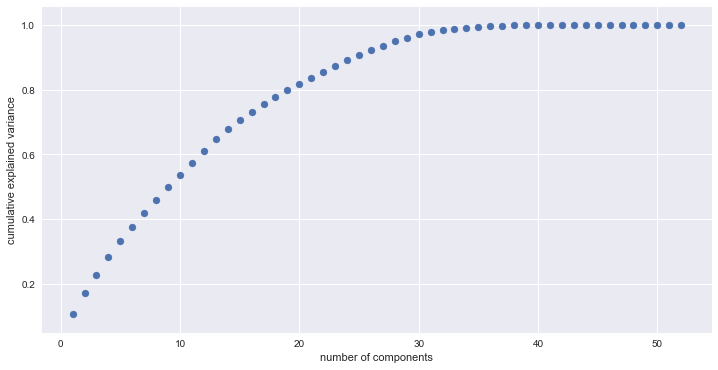

In [25]:
pca_fit = pca.fit(train_features_std)
_ = plt.figure(figsize = (12,6))
sns.set(style = 'darkgrid')
_ = plt.scatter(np.arange(1,53), np.cumsum(pca_fit.explained_variance_ratio_))
_ = plt.xlabel('number of components')
_ = plt.ylabel('cumulative explained variance')

The explained variance seems to get to its max when using 35 components. I will calculate how many components are needed to retain 99% of variance, and then decide how many components to use.

In [26]:
ev_nc = pd.DataFrame({'num_components' : np.arange(1,53), 'ev' : np.cumsum(pca_fit.explained_variance_ratio_)})

In [27]:
num_comp = []
for n, m in zip(['99%', '95%', '90%'], [.99, .95, .9]):
    e = min(ev_nc['num_components'][ev_nc['ev'] >= m])
    num_comp.append(e)
    print('In order to retain ', n, ' of explained variance ', e, ' components are required.')

In order to retain  99%  of explained variance  34  components are required.
In order to retain  95%  of explained variance  29  components are required.
In order to retain  90%  of explained variance  25  components are required.


I am exporting the pca dataset in order to use it in my RF classifier.

In [28]:
np.savetxt('../train_features_pca.txt', train_features_pca, fmt='%d')
np.savetxt('../test_features_pca.txt', test_features_pca, fmt='%d')